TASK 1 - LOAD THE DATA

In [3]:
import pandas as pd
df = pd.read_excel("Online Retail.xlsx")

In [4]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [5]:
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [ ]:
TASK 2 - EXPLORE THE DATA

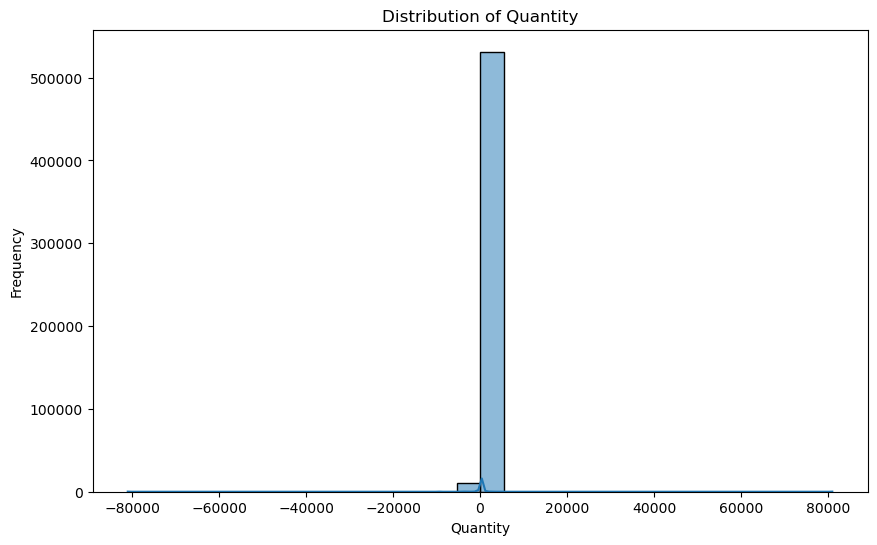

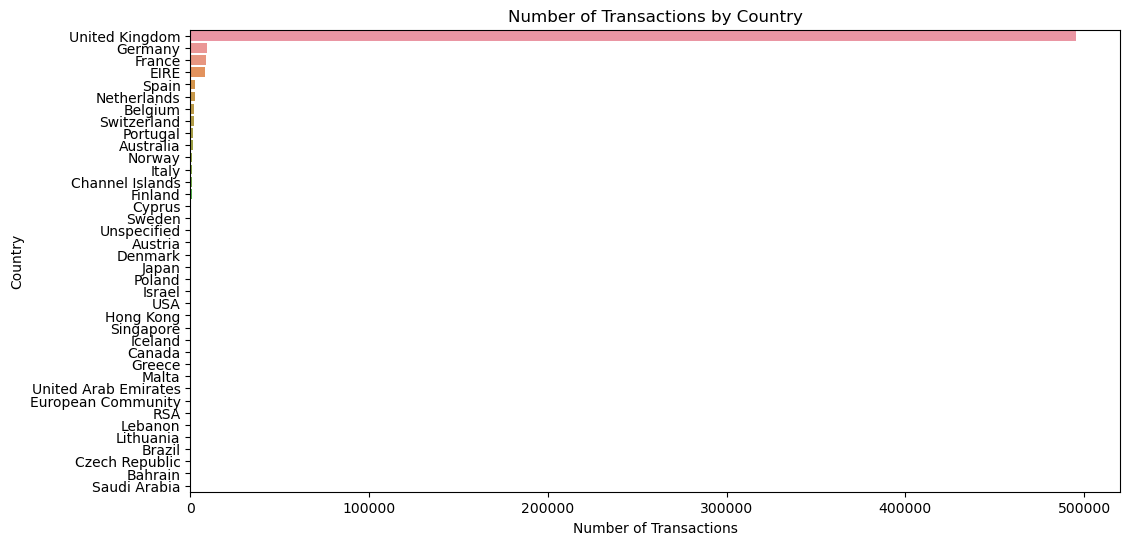

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Count plot of Country
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Number of Transactions by Country')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()


TASK 3 - CLEAN AND VALIDATE THE DATA

In [7]:
# Check for missing values
print(df.isnull().sum())
df['CustomerID'].fillna('Unknown', inplace=True)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

Duplicate rows: 5268


In [9]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

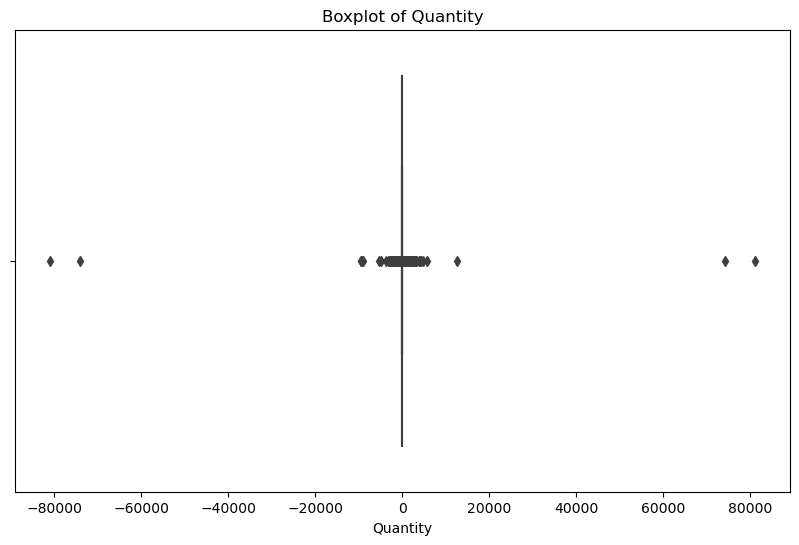

In [11]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()

TASK 4 - ANALYZE THE DATA

Analyzing Sales Trends Over Time

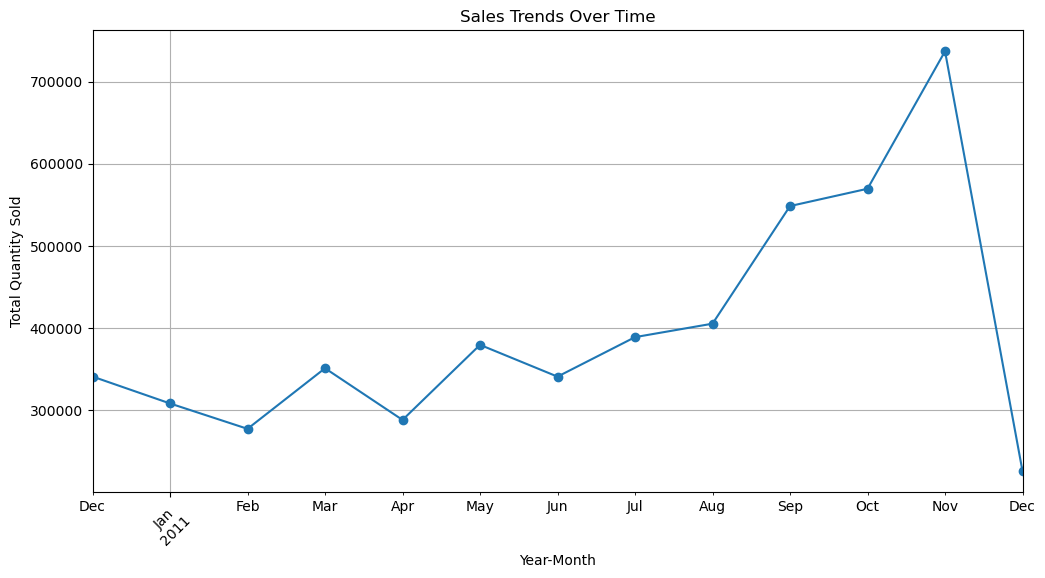

In [14]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

sales_over_time = df.groupby('YearMonth')['Quantity'].sum()

plt.figure(figsize=(12, 6))
sales_over_time.plot(marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Analyzing Sales by Country

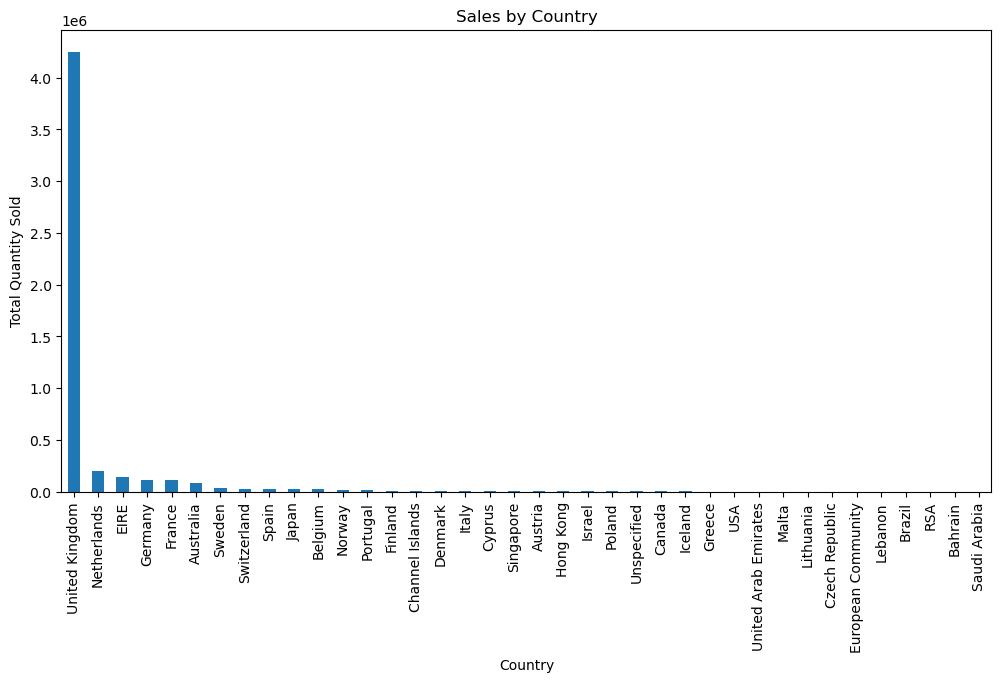

In [15]:
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_country.plot(kind='bar')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

Analyzing Product Sales

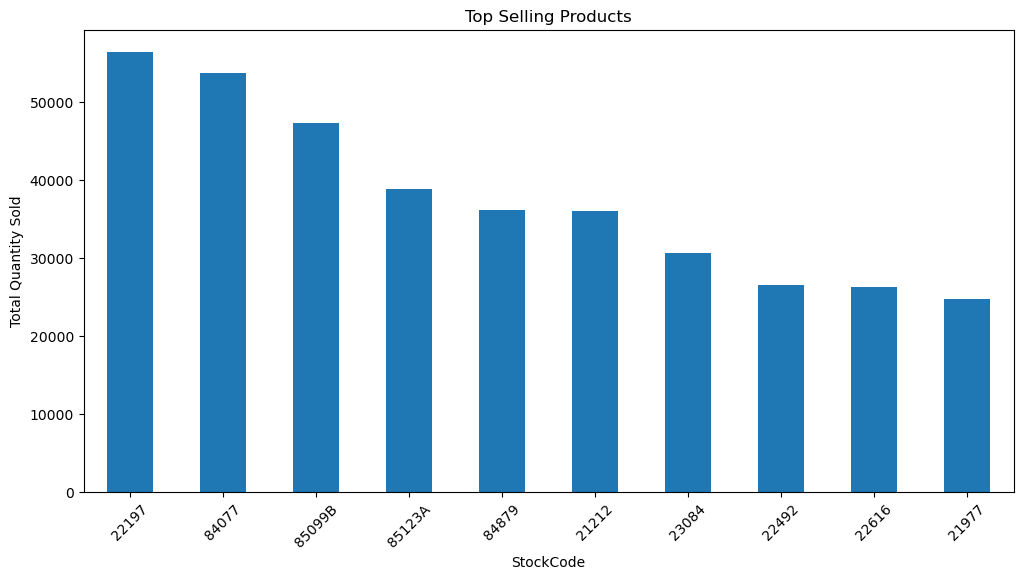

In [16]:
top_selling_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()